# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [5]:
import os
import sys
import autogen
from textwrap import dedent
# 添加父目錄到 Python 路徑
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [6]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4o"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [7]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

In [8]:
company = "Nvidia"
fyear = "2024"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Nvidia's 2024 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------


Expert_Investor (to User_Proxy):

To create a comprehensive annual report for Nvidia's 2024 10-K filing, I will follow a structured approach using the tools provided. Here's the step-by-step plan:

1. **Obtain the 10-K Report URL and Filing Date**: First, I'll retrieve Nvidia's 2024 10-K report URL and filing date to ensure we have the most recent and relevant data.

2. **Extract and Analyze Key Financial Statements**:
   - **Income Statement**: I'll retrieve and analyze Nvidia's income statement to understand revenue, expenses, and profitability.
   - **Balance Sheet**: This will provide insights into Nvidia's assets, liabilities, and equity.
   - **Cash Flow Statement**: I'll analyze the cash flow statement to understand cash inflows and outflows.

3. **Business Overview and Market Position**:
   - **Company Description**: I'll describe Nvidia's industry, strengths, trends, and strategic initiatives.
   - **Business Highlights**: I'll highlight the performance per business segment.
 

The Rest Cells are optional, simply used to show the generated PDF

In [1]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 4.5 MB/s eta 0:00:0000:0100:01


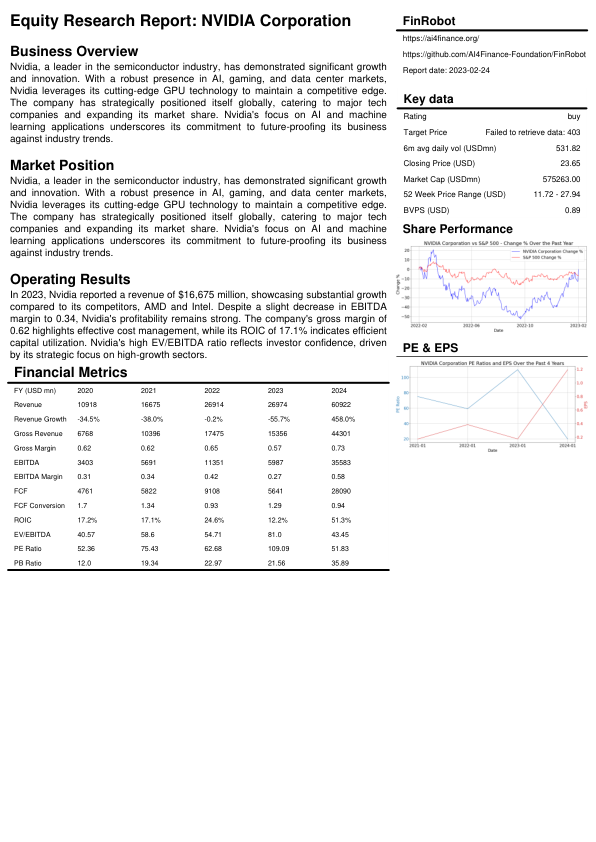

In [2]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/nvda_annual_report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)

In [3]:
import os

# 顯示當前工作目錄
print("Current working directory:", os.getcwd())

# 列出當前目錄的內容
print("\nDirectory contents:")
for item in os.listdir():
    print(item)

# 如果 finrobot 資料夾存在，列出其內容
if os.path.exists('finrobot'):
    print("\nfinrobot directory contents:")
    for item in os.listdir('finrobot'):
        print(item)

Current working directory: /Users/cck_mba_2022/Documents/Code2025/OSS/FinRobot/tutorials_beginner

Directory contents:
agent_rag_qa.ipynb
agent_annual_report.ipynb
agent_fingpt_forecaster.ipynb
agent_rag_earnings_call_sec_filings.ipynb
ollama stock chart.ipynb
agent_rag_qa_up.ipynb
ollama function call.ipynb
.cache


In [4]:
print("Parent directory contents:")
print(os.listdir(".."))

Parent directory contents:
['New Template', 'finrobot', 'FinNLP', '.DS_Store', 'LICENSE', 'requirements.txt', 'OAI_CONFIG_LIST', 'tutorials_beginner', 'test_module.py', 'figs', 'agent_builder_demo.py', 'tutorials_advanced', 'experiments', 'tests', 'FinRobot.egg-info', 'config_api_keys', '.gitmodules', 'README.md', 'setup.py', '.gitignore', 'configs', 'report', '.vscode']
